In [1]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def plot_images(img1,img2,title1="", title2=""):
    fig = plt.figure(figsize=(15,15))
    axl = fig.add_subplot(121)
    axl.imshow(img1,cmap="gray")
    axl.set(xticks=[],yticks=[],title=title1)
    
    axl = fig.add_subplot(122)
    axl.imshow(img2,cmap="gray")
    axl.set(xticks=[],yticks=[],title=title2)
         

In [3]:
path = "./data/2.jpg"


In [4]:
image = cv2.imread(path)

In [6]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [8]:
blur = cv2.bilateralFilter(gray ,11,90,90)

In [10]:
edges = cv2.Canny(blur,30,200)

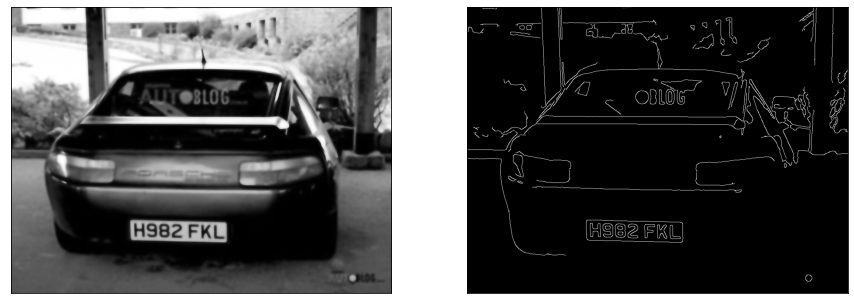

In [11]:
plot_images(blur,edges)

In [12]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
image_copy= image.copy()

In [14]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

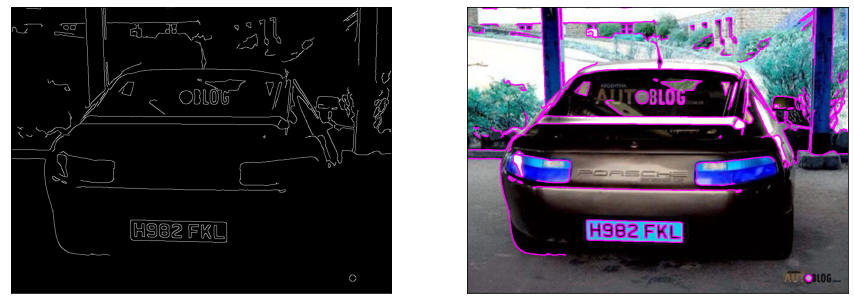

In [15]:
plot_images(edges,image_copy)

In [16]:
cnts = sorted(cnts,key=cv2.contourArea,reverse=True)[:10]

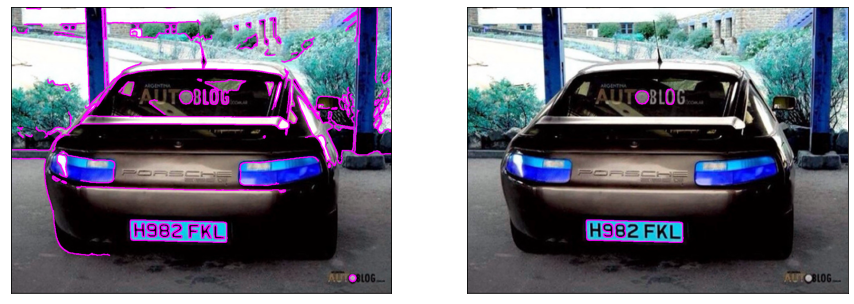

In [17]:
image_Reduce_copy= image.copy()
_=cv2.drawContours(image_Reduce_copy,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_Reduce_copy)

In [18]:
print(len(cnts))

10


In [19]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c,True)
    edges_count= cv2.approxPolyDP(c, 0.02*perimeter ,True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h , x:x+w]
        break

cv2.imwrite("Plate.png", plate)
    


True

In [20]:

pytesseract.pytesseract.tesseract_cmd = r'E:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(plate, lang="eng")

In [21]:
cv2.putText(image,str(text),(x,y),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),3)
cv2.imshow("image",image)
cv2.waitKey(0)


-1